MILESTONE- 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pycountry
import warnings
warnings.filterwarnings('ignore')


In [2]:
# 1.Load the dataset from the CSV file
print("Loading Data")
df = pd.read_csv('GlobalWeatherRepository.csv')
print("Data loaded successfully.")




Loading Data
Data loaded successfully.


In [3]:
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [4]:
#showing number of colums and rows
len(df.index)
len(df.columns)
df.shape

(88663, 41)

In [5]:
# 2. Initial Inspection of the Data
print("\n First 10 Rows")
print(df.head(10))

print("\n Data Types & Missing Values")
df.info()

print("\n Statistical Summary")
print(df.describe())


 First 10 Rows
               country     location_name  latitude  longitude  \
0          Afghanistan             Kabul     34.52      69.18   
1              Albania            Tirana     41.33      19.82   
2              Algeria           Algiers     36.76       3.05   
3              Andorra  Andorra La Vella     42.50       1.52   
4               Angola            Luanda     -8.84      13.23   
5  Antigua and Barbuda      Saint John's     17.12     -61.85   
6            Argentina      Buenos Aires    -34.59     -58.67   
7              Armenia           Yerevan     40.18      44.51   
8            Australia          Canberra    -35.28     149.22   
9              Austria            Vienna     48.20      16.37   

                         timezone  last_updated_epoch      last_updated  \
0                      Asia/Kabul          1715849100  2024-05-16 13:15   
1                   Europe/Tirane          1715849100  2024-05-16 10:45   
2                  Africa/Algiers          

In [6]:
# 3. Clen the data
print(f"Original dataset size: {df.shape[0]} rows")

# Get a summary of the 'wind_kph' column before cleaning
print("\n Summary Before Cleaning")
print(df['wind_kph'].describe())

# Filter the DataFrame to remove anomalies
df_cleaned = df[df['wind_kph'] < 500].copy()

# Get a summary of the 'wind_kph' column after cleaning
print("\n Summary After Cleaning")
print(df_cleaned['wind_kph'].describe())

print(f"\nCleaned dataset size: {df_cleaned.shape[0]} rows")

# Re-assign the cleaned data to the original DataFrame
df = df_cleaned

Original dataset size: 88663 rows

 Summary Before Cleaning
count    88663.000000
mean        13.342914
std         13.073780
min          3.600000
25%          6.500000
50%         11.200000
75%         18.400000
max       2963.200000
Name: wind_kph, dtype: float64

 Summary After Cleaning
count    88662.000000
mean        13.309643
std          8.531078
min          3.600000
25%          6.500000
50%         11.200000
75%         18.400000
max        272.200000
Name: wind_kph, dtype: float64

Cleaned dataset size: 88662 rows


In [7]:
# 4. Prepare for Time-Series Analysis: Convert date column
print("\nConverting 'last_updated' column to date time format")
df['last_updated'] = pd.to_datetime(df['last_updated'])
print("Conversion complete. Data type is now:", df['last_updated'].dtype)


Converting 'last_updated' column to date time format
Conversion complete. Data type is now: datetime64[ns]


In [8]:
# Define temperature bins and labels
bins = [-100, 0, 15, 30, 100] # Example ranges
labels = ['Freezing', 'Cold', 'Mild', 'Hot']

# Create a new column with temperature categories
df['temperature_category'] = pd.cut(df['temperature_celsius'], bins=bins, labels=labels, right=False)

# Display the new column
print("\n DataFrame with Temperature Categories")
print(df[['temperature_celsius', 'temperature_category']].head())


 DataFrame with Temperature Categories
   temperature_celsius temperature_category
0                 26.6                 Mild
1                 19.0                 Mild
2                 23.0                 Mild
3                  6.3                 Cold
4                 26.0                 Mild


In [9]:
# 5. Structure for Time-Series: Set datetime index
df.set_index('last_updated', inplace=True)
print("\n'last_updated' column has been set as the index.")


'last_updated' column has been set as the index.


In [10]:
# Group the data by country and calculate the average temperature
average_temp_by_country = df.groupby('country')['temperature_celsius'].mean()

# Display the aggregated data
print("\n Average Temperature per Country")
print(average_temp_by_country.head(50)) # Print the first 10 entries for a cleaner output


 Average Temperature per Country
country
Afghanistan                     21.272807
Albania                         23.005044
Algeria                         23.372967
Andorra                         12.241886
Angola                          26.664474
Antigua and Barbuda             26.784292
Argentina                       13.882159
Armenia                         20.502412
Australia                       11.912061
Austria                         15.851209
Azerbaijan                      20.750110
Bahamas                         25.296222
Bahrain                         31.634430
Bangladesh                      31.308590
Barbados                        27.335022
Belarus                         13.273026
Belgium                         14.241144
Belize                          22.913717
Benin                           29.085495
Bhutan                          13.261758
Bolivia                         17.100554
Bosnia and Herzegovina          16.678728
Botswana                        24

In [11]:
# Calculate average temperature by country and find the hottest/coldest
avg_temp_by_country = df_cleaned.groupby('country')['temperature_celsius'].mean()
hottest_countries = avg_temp_by_country.nlargest(5)
coldest_countries = avg_temp_by_country.nsmallest(5)

print("\nTop 5 Hottest Countries:")
print(hottest_countries)

print("\nTop 5 Coldest Countries:")
print(coldest_countries)


Top 5 Hottest Countries:
country
Saudi Arabien    45.000000
Marrocos         40.300000
Turkménistan     37.800000
Qatar            34.237363
Kuwait           34.035965
Name: temperature_celsius, dtype: float64

Top 5 Coldest Countries:
country
Iceland                     6.573465
Mongolia                    6.774670
Canada                      7.597351
United States of America    8.865111
Norway                      9.615604
Name: temperature_celsius, dtype: float64


In [12]:
# 6. Aggregate to Monthly Averages
print("\n Aggregating data to monthly averages")
columns_to_average = ['temperature_celsius', 'wind_kph', 'precip_mm', 'humidity']
monthly_averages = df.groupby('country')[columns_to_average].resample('ME').mean()
print("Aggregation complete.")

#Displaying the result in a table format

# Reset the index to turn the grouped data into a flat table
monthly_averages_table = monthly_averages.reset_index()

# Display the first 5 rows of the new aggregated table
monthly_averages_table.head()


 Aggregating data to monthly averages
Aggregation complete.


,country,last_updated,temperature_celsius,wind_kph,precip_mm,humidity
0,Afghanistan,2024-05-31,20.305882,11.517647,0.108824,38.058824
1,Afghanistan,2024-06-30,25.590000,17.110000,0.072667,24.833333
2,Afghanistan,2024-07-31,31.303448,20.731034,0.000345,17.931034
3,Afghanistan,2024-08-31,30.848387,20.196774,0.037097,20.548387
4,Afghanistan,2024-09-30,28.216667,12.223333,0.014333,13.733333


In [13]:
# 7. Display a sample of the result
print("\n Monthly Averages for India")
print(monthly_averages.loc['India'])


 Monthly Averages for India
              temperature_celsius   wind_kph  precip_mm   humidity
last_updated                                                      
2024-05-31              39.588235  10.282353   0.000000  20.764706
2024-06-30              38.200000  14.055172   0.097586  32.379310
2024-07-31              34.528571   9.960714   0.250000  60.428571
2024-08-31              32.041935  11.493548   0.204516  68.645161
2024-09-30              31.013333   9.166667   0.092667  71.266667
2024-10-31              34.716129   9.264516   0.000000  29.709677
2024-11-30              28.950000   7.010000   0.000000  31.566667
2024-12-31              21.880645   9.054839   0.003226  31.645161
2025-01-31              20.732258   9.729032   0.000968  47.774194
2025-02-28              25.100000  11.910714   0.000000  33.607143
2025-03-31              30.783871  12.500000   0.000000  23.064516
2025-04-30              37.520000   7.233333   0.027667  18.366667
2025-05-31              35.993548


 Generating Visualizations


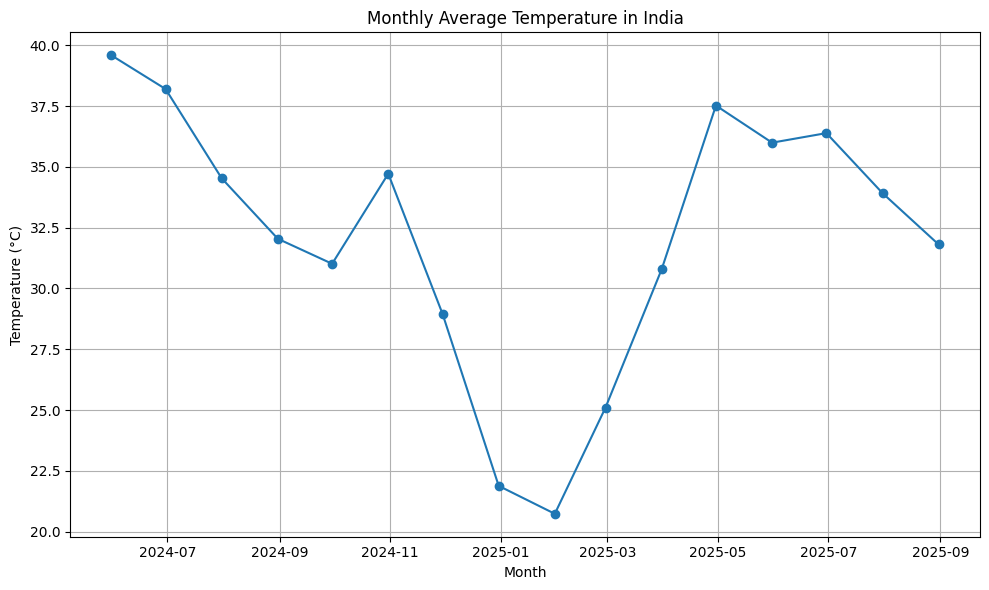

In [14]:
# 8. Data Visualization using Matplotlib
print("\n Generating Visualizations")

#Visualization 1: Line Chart for Temperature Trend in a Single Country 
# Select data for a specific country (India)
india_monthly_data = monthly_averages.loc['India']

plt.figure(figsize=(10, 6)) # Create a figure with a specific size
plt.plot(india_monthly_data.index, india_monthly_data['temperature_celsius'], marker='o', linestyle='-')
plt.title('Monthly Average Temperature in India')
plt.xlabel('Month')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.tight_layout() # Adjust layout to make room for labels
plt.show()

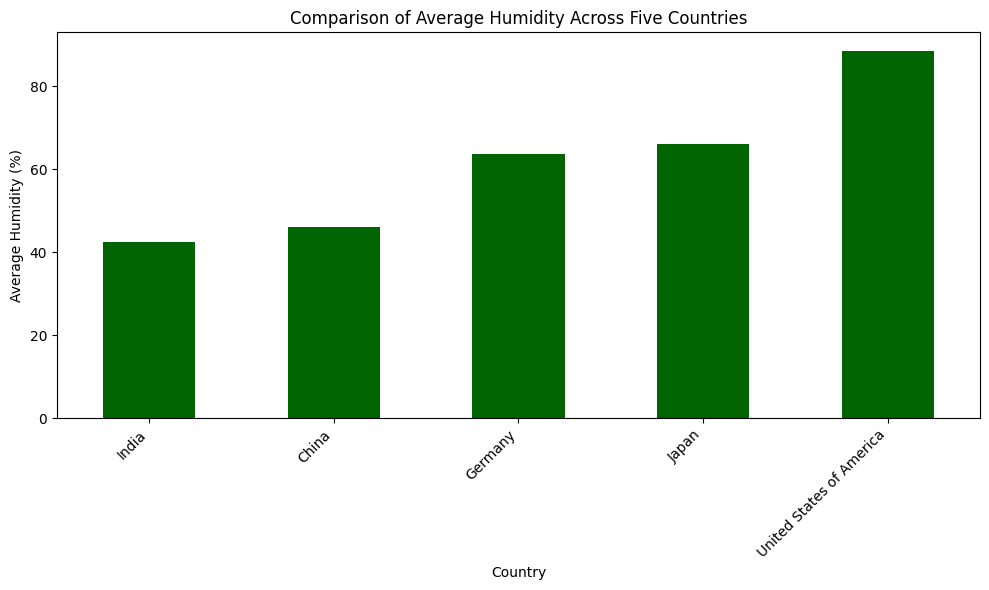

In [15]:
#  Visualization 2: Get the overall average humidity for a few sample countries
avg_humidity_by_country = monthly_averages.groupby('country')['humidity'].mean()
sample_countries = avg_humidity_by_country.loc[['India', 'United States of America', 'Germany', 'China', 'Japan']].sort_values()

plt.figure(figsize=(10, 6))
sample_countries.plot(kind='bar', color='darkgreen')
plt.title('Comparison of Average Humidity Across Five Countries')
plt.xlabel('Country')
plt.ylabel('Average Humidity (%)')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


 Analyzing Weather Conditions for Pie Chart


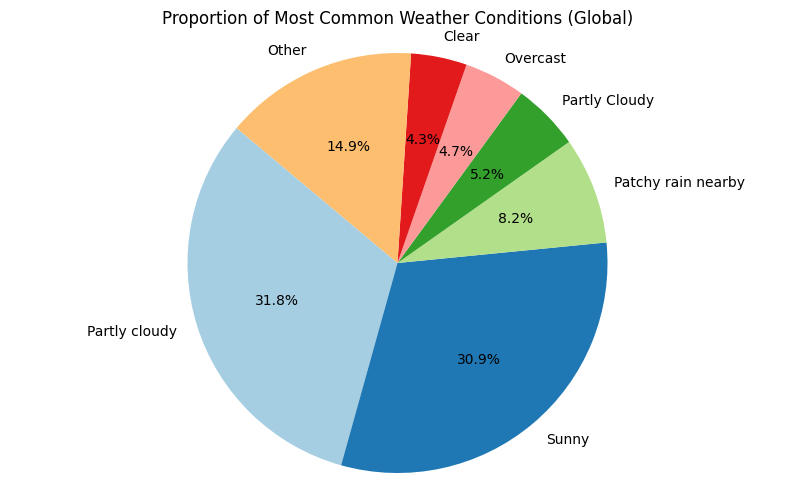


Visualizations generated successfully.


In [16]:
# Visualization 3: Pie Chart of Most Common Weather Conditions
# Use the original (unaggregated) dataframe for this
print("\n Analyzing Weather Conditions for Pie Chart")
condition_counts = df['condition_text'].value_counts()

# To make the pie chart readable, we'll group less common conditions into 'Other'
top_conditions = condition_counts.head(6)
other_count = condition_counts.iloc[6:].sum()
top_conditions['Other'] = other_count

plt.figure(figsize=(10, 6))
plt.pie(top_conditions, labels=top_conditions.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Proportion of Most Common Weather Conditions (Global)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


print("\nVisualizations generated successfully.")

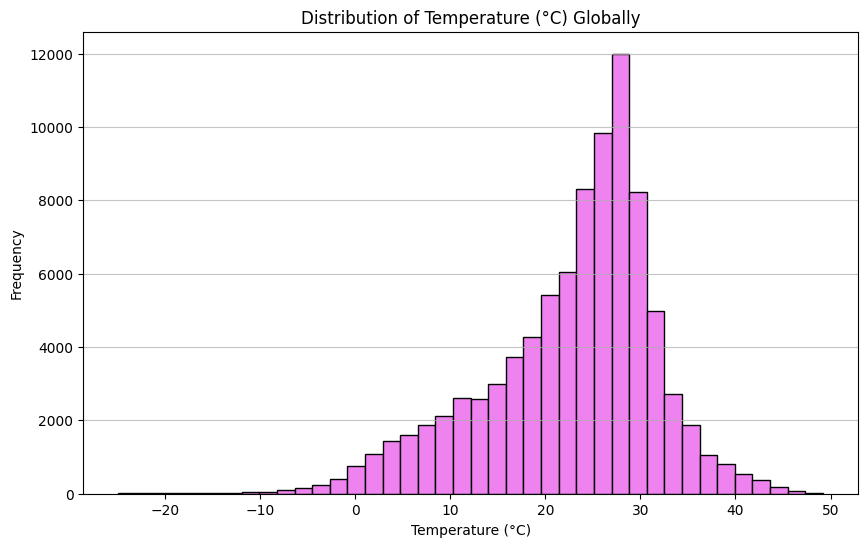

In [17]:
#Visualization 4: the distribution of temperatures using a histogram.
plt.figure(figsize=(10, 6))
plt.hist(df['temperature_celsius'], bins=40, color='violet', edgecolor='black')
plt.title('Distribution of Temperature (°C) Globally')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()
#This helps us understand the most common temperature ranges and the overall spread of the data.plt.figure(figsize=(10, 6))

Milestone-1 Completed

Milestone 2: Core Analysis & Visualization Design

In [18]:
# The following code requires scikit-learn. You may need to install it:
# pip install scikit-learn

from sklearn.cluster import KMeans

# Prepare data for clustering
clustering_data = df_cleaned.groupby('country')[['temperature_celsius', 'humidity', 'precip_mm', 'wind_kph']].mean()

# Initialize KMeans with a chosen number of clusters (e.g., 4)
kmeans = KMeans(n_clusters=4, random_state=0, n_init=10) # Set n_init to avoid warnings

# Fit the model and get the cluster labels
clusters = kmeans.fit_predict(clustering_data)

# Add the cluster labels to your DataFrame
clustering_data['cluster'] = clusters

print("\nCountries grouped by climate cluster (first 10):")
print(clustering_data.head(10))


Countries grouped by climate cluster (first 10):
                     temperature_celsius   humidity  precip_mm   wind_kph  \
country                                                                     
Afghanistan                    21.272807  24.975877   0.041732  10.256360   
Albania                        23.005044  48.682018   0.134890   9.709649   
Algeria                        23.372967  57.652747   0.036505  13.565055   
Andorra                        12.241886  58.385965   0.130504   8.693202   
Angola                         26.664474  71.888158   0.032829  10.226754   
Antigua and Barbuda            26.784292  78.203540   0.103385  24.218142   
Argentina                      13.882159  82.651982   0.079515  10.240749   
Armenia                        20.502412  35.741228   0.049386   7.880482   
Australia                      11.912061  74.699561   0.076206  10.533553   
Austria                        15.851209  61.589011   0.085538  13.719121   

                     clus

In [19]:
#Visualization 5: Interactive Geographical Map (Plotly)
print("\n Generating Interactive Geographic Map Plot")
# For better performance on the map, we can sample the data if it's too large
map_data = df_cleaned.reset_index().sample(n=5000, random_state=1) if len(df_cleaned) > 5000 else df_cleaned.reset_index()

fig = px.scatter_geo(map_data,
                     lat='latitude',
                     lon='longitude',
                     color='temperature_celsius',
                     hover_name='location_name',
                     hover_data={'latitude': False, 'longitude': False, 'temperature_celsius': ':.1f'},
                     projection='natural earth',
                     title='Geographic Distribution of Weather Stations by Temperature',
                     color_continuous_scale=px.colors.sequential.Plasma)

fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()


print("\nVisualizations generated successfully.")


 Generating Interactive Geographic Map Plot



Visualizations generated successfully.


In [20]:
# Top 10 Windiest Events
top_10_windy = df_cleaned.nlargest(10, 'wind_kph')
print("\n Top 10 Windiest Individual Events Recorded")
print(top_10_windy[['country', 'location_name', 'wind_kph']])


 Top 10 Windiest Individual Events Recorded
                                   country   location_name  wind_kph
last_updated                                                        
2024-06-21 16:30:00               Ethiopia     Addis Ababa     272.2
2024-05-21 16:45:00                Burundi       Bujumbura     258.8
2024-06-28 09:15:00  Saint Kitts and Nevis      Basseterre     205.9
2024-05-20 02:00:00           Fiji Islands            Suva     172.1
2025-02-06 10:15:00                Iceland  Vestmannaeyjar      91.1
2024-07-01 09:15:00               Barbados      Bridgetown      81.0
2024-08-27 14:15:00                 Norway            Oslo      78.1
2024-11-15 09:00:00                Iceland  Vestmannaeyjar      76.7
2024-09-11 14:15:00                 Norway            Oslo      76.0
2024-12-25 10:15:00                Iceland  Vestmannaeyjar      76.0


Statistical Summary:


,temperature_celsius,precip_mm,air_quality_PM2.5,wind_kph,humidity
count,88663.000000,88663.000000,88663.000000,88663.000000,88663.000000
mean,22.694021,0.140948,26.217064,13.342914,63.745441
std,9.083406,0.601763,41.478632,13.073780,24.263879
min,-24.900000,0.000000,0.168000,3.600000,2.000000
25%,18.000000,0.000000,7.100000,6.500000,46.000000
50%,25.000000,0.000000,14.985000,11.200000,69.000000
75%,28.400000,0.030000,30.340000,18.400000,83.000000
max,49.200000,42.240000,1614.100000,2963.200000,100.000000


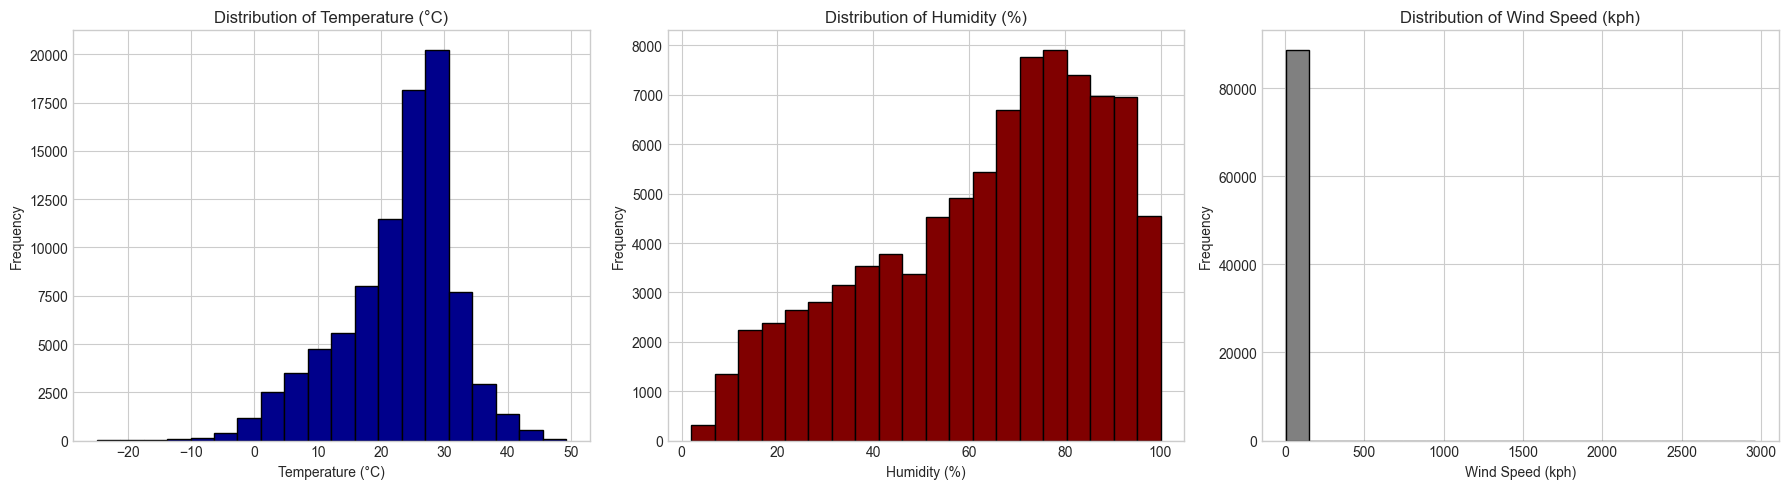

In [38]:
# Statistical Analysis
# This provides a quick summary of the main attributes
# It calculates the count, mean, standard deviation, min/max, and quartiles
statistical_summary = df[['temperature_celsius', 'precip_mm', 'air_quality_PM2.5', 'wind_kph', 'humidity']].describe()
print("Statistical Summary:")
display(statistical_summary)

#Visualization of Distributions with Histograms
plt.style.use('seaborn-v0_8-whitegrid')
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))

# Histogram for Temperature
axes[0].hist(df['temperature_celsius'], bins=20, color='Darkblue', edgecolor='black')
axes[0].set_title('Distribution of Temperature (°C)')
axes[0].set_xlabel('Temperature (°C)')
axes[0].set_ylabel('Frequency')

# Histogram for Humidity
axes[1].hist(df['humidity'], bins=20, color='maroon', edgecolor='black')
axes[1].set_title('Distribution of Humidity (%)')
axes[1].set_xlabel('Humidity (%)')
axes[1].set_ylabel('Frequency')

# Histogram for Wind Speed
axes[2].hist(df['wind_kph'], bins=20, color='grey', edgecolor='black')
axes[2].set_title('Distribution of Wind Speed (kph)')
axes[2].set_xlabel('Wind Speed (kph)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

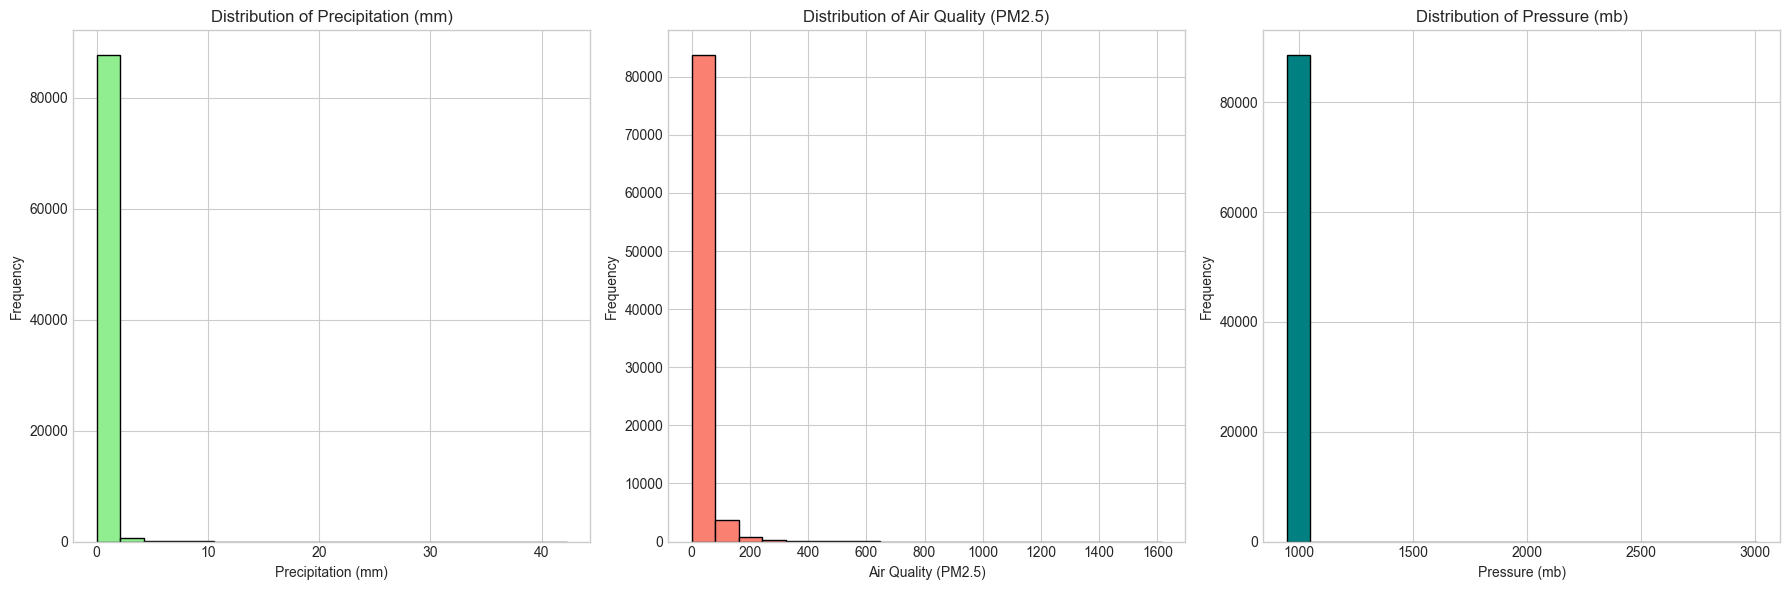

In [22]:
# Create a figure with a 3 grids of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Histogram for Precipitation
axes[0].hist(df['precip_mm'], bins=20, color='lightgreen', edgecolor='black')
axes[0].set_title('Distribution of Precipitation (mm)')
axes[0].set_xlabel('Precipitation (mm)')
axes[0].set_ylabel('Frequency')

# Histogram for Air Quality (PM2.5)
axes[1].hist(df['air_quality_PM2.5'], bins=20, color='salmon', edgecolor='black')
axes[1].set_title('Distribution of Air Quality (PM2.5)')
axes[1].set_xlabel('Air Quality (PM2.5)')
axes[1].set_ylabel('Frequency')

# Histogram for Pressure
axes[2].hist(df['pressure_mb'], bins=20, color='teal', edgecolor='black')
axes[2].set_title('Distribution of Pressure (mb)')
axes[2].set_xlabel('Pressure (mb)')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Correlation Matrix of Monthly Averages


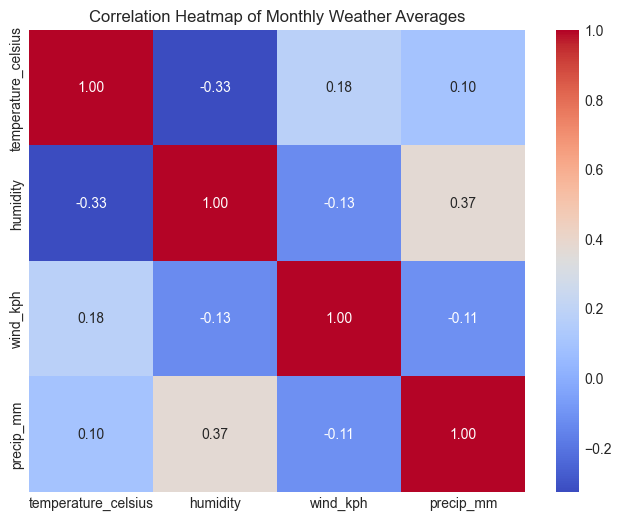

In [23]:
#Perform Statistical Analysis: Correlation Heatmap
print("\nCorrelation Matrix of Monthly Averages")
# Select the key numerical columns for the correlation matrix
correlation_df = monthly_averages_table[['temperature_celsius', 'humidity', 'wind_kph', 'precip_mm']]
correlation_matrix = correlation_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Monthly Weather Averages')
plt.show()


 Generating Trend and Relationship Plots for a Sample Country (India)


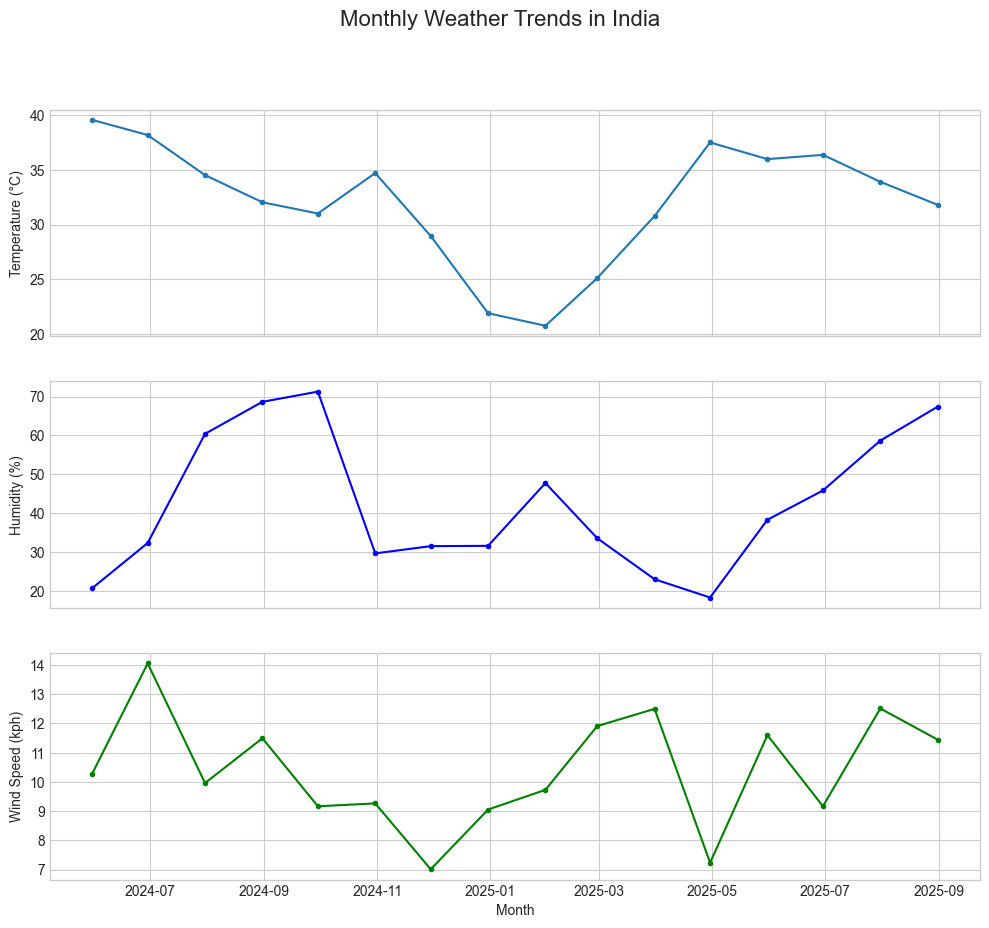

In [24]:
#Line Charts & Scatter Plots (Seasonal Patterns & Trends)
print("\n Generating Trend and Relationship Plots for a Sample Country (India)")
country_to_analyze = 'India'
country_data = monthly_averages_table[monthly_averages_table['country'] == country_to_analyze]

# Line chart to show trends for Temperature, Humidity, and Wind Speed
fig, axes = plt.subplots(3, 1, figsize=(12, 10), sharex=True)
fig.suptitle(f'Monthly Weather Trends in {country_to_analyze}', fontsize=16)
axes[0].plot(country_data['last_updated'], country_data['temperature_celsius'], marker='.', linestyle='-')
axes[0].set_ylabel("Temperature (°C)")
axes[0].grid(True)
axes[1].plot(country_data['last_updated'], country_data['humidity'], marker='.', linestyle='-', color='b')
axes[1].set_ylabel("Humidity (%)")
axes[1].grid(True)
axes[2].plot(country_data['last_updated'], country_data['wind_kph'], marker='.', linestyle='-', color='g')
axes[2].set_ylabel("Wind Speed (kph)")
axes[2].set_xlabel("Month")
axes[2].grid(True)
plt.show()



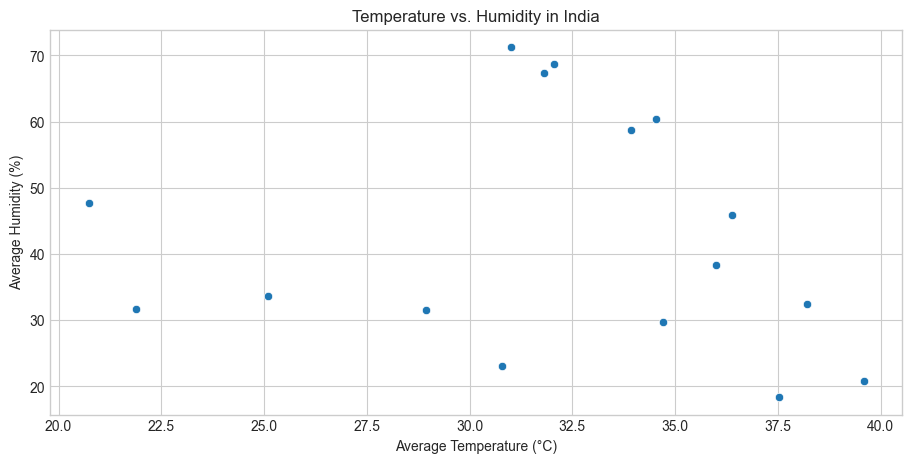

In [25]:
# Scatter plot for Temperature vs. Humidity relationship
plt.figure(figsize=(11, 5))
sns.scatterplot(data=country_data, x='temperature_celsius', y='humidity')
plt.title(f'Temperature vs. Humidity in {country_to_analyze}')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Average Humidity (%)')
plt.grid(True)
plt.show()


 Generating Seasonal Heatmap for a Sample of Countries


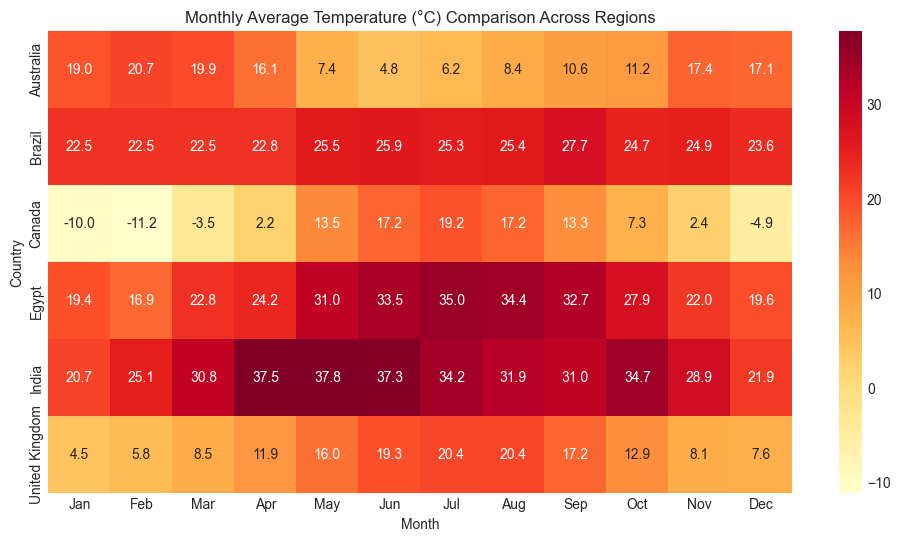

In [26]:
# C. Heatmap (Advanced Seasonal Pattern Comparison)
# This compares monthly temperatures across a few sample countries.
print("\n Generating Seasonal Heatmap for a Sample of Countries")
sample_countries = ['India', 'United Kingdom', 'Egypt', 'Brazil', 'Australia', 'Canada']
heatmap_data = monthly_averages_table[monthly_averages_table['country'].isin(sample_countries)].copy()
heatmap_data['month_name'] = heatmap_data['last_updated'].dt.strftime('%b') # Get month abbreviation (e.g., Jan)

# Pivot the data to create a matrix: countries on rows, months on columns
heatmap_pivot = heatmap_data.pivot_table(values='temperature_celsius', index='country', columns='month_name', aggfunc='mean')
# Order the months correctly
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
heatmap_pivot = heatmap_pivot[month_order]

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_pivot, annot=True, fmt=".1f", cmap='YlOrRd')
plt.title('Monthly Average Temperature (°C) Comparison Across Regions')
plt.xlabel('Month')
plt.ylabel('Country')
plt.show()

In [27]:
#3: IDENTIFY EXTREME WEATHER EVENTS
print("\nIdentifying Top 10 Extreme Weather Events from Daily Data")

# We use the original 'df_cleaned' dataframe here for daily granularity.
# Top 10 Hottest Events
top_10_hottest = df_cleaned.nlargest(10, 'temperature_celsius').reset_index()
print("\n-Top 10 Hottest Individual Events ---")
print(top_10_hottest[['country', 'location_name', 'last_updated', 'temperature_celsius']])

# Top 10 Highest Precipitation Events
top_10_precip = df_cleaned.nlargest(10, 'precip_mm').reset_index()
print("\n--- Top 10 Highest Precipitation Individual Events ---")
print(top_10_precip[['country', 'location_name', 'last_updated', 'precip_mm', 'condition_text']])



Identifying Top 10 Extreme Weather Events from Daily Data

-Top 10 Hottest Individual Events ---
  country location_name        last_updated  temperature_celsius
0  Kuwait   Kuwait City 2024-06-19 16:45:00                 49.2
1    Iraq       Baghdad 2024-06-22 16:45:00                 49.1
2    Iraq       Baghdad 2024-07-11 15:45:00                 49.1
3  Kuwait   Kuwait City 2024-06-27 16:15:00                 48.9
4    Iraq       Baghdad 2024-07-12 15:45:00                 48.8
5  Kuwait   Kuwait City 2025-07-28 11:30:00                 48.8
6  Kuwait   Kuwait City 2025-06-16 12:00:00                 48.6
7    Iraq       Baghdad 2024-06-21 16:30:00                 48.4
8    Iraq       Baghdad 2024-07-05 15:45:00                 48.3
9  Kuwait   Kuwait City 2025-08-13 11:30:00                 48.2

--- Top 10 Highest Precipitation Individual Events ---
         country location_name        last_updated  precip_mm  \
0        Jamaica    Port Royal 2024-11-05 04:00:00      42.24   
1


Number of extreme weather events (Temperature, Precipitation, Air Quality): 4184

Head of the new extreme weather events DataFrame:
      country   location_name      last_updated  temperature_celsius  \
4      Angola          Luanda  2024-05-16 09:45                 26.0   
35      Chile        Santiago  2024-05-16 04:45                  1.0   
68  Guatemala  Guatemala City  2024-05-16 02:45                 20.0   
77      India       New Delhi  2024-05-16 14:15                 42.0   
78  Indonesia         Jakarta  2024-05-16 15:45                 32.0   

    precip_mm  air_quality_PM2.5  
4        0.00              183.4  
35       0.00              211.1  
68       0.09              132.0  
77       0.00               25.4  
78       0.02              196.1  


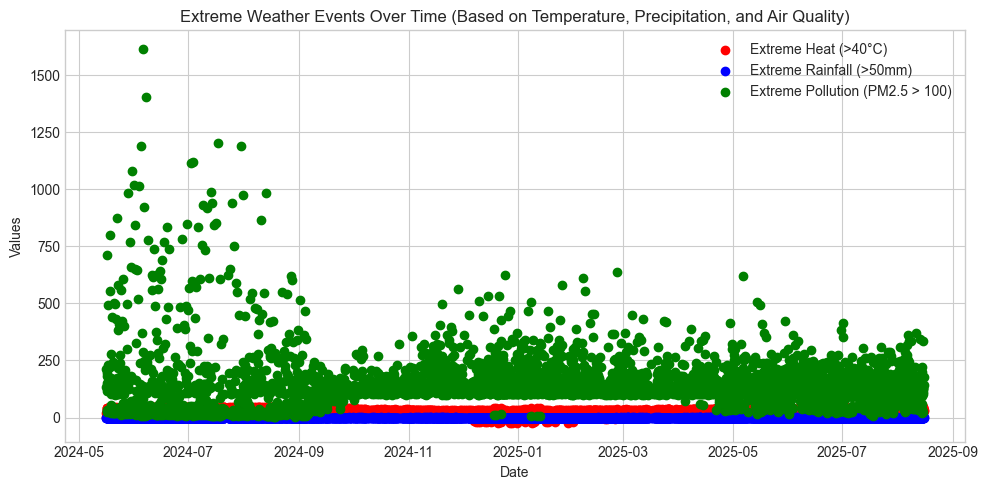

In [28]:
# Load the dataset
df = pd.read_csv('GlobalWeatherRepository.csv')

# Extreme Weather Events (using Temperature, Precipitation, and Air Quality)
# Filter for extreme conditions using the new attributes
extreme_conditions_new = df[
    (df['temperature_celsius'] > 40) |
    (df['precip_mm'] > 50) |
    (df['air_quality_PM2.5'] > 100)
]

# Print the number of new extreme weather events
print("\nNumber of extreme weather events (Temperature, Precipitation, Air Quality):", len(extreme_conditions_new))

# Display the head of the new filtered DataFrame
print("\nHead of the new extreme weather events DataFrame:")
print(extreme_conditions_new[['country', 'location_name', 'last_updated',
                              'temperature_celsius', 'precip_mm', 'air_quality_PM2.5']].head())

# Convert 'last_updated' to datetime for plotting
extreme_conditions_new['last_updated'] = pd.to_datetime(extreme_conditions_new['last_updated'])

# Visualization of extremes
plt.figure(figsize=(10, 5))
plt.scatter(extreme_conditions_new['last_updated'], extreme_conditions_new['temperature_celsius'],
            color='red', label='Extreme Heat (>40°C)')
plt.scatter(extreme_conditions_new['last_updated'], extreme_conditions_new['precip_mm'],
            color='blue', label='Extreme Rainfall (>50mm)')
plt.scatter(extreme_conditions_new['last_updated'], extreme_conditions_new['air_quality_PM2.5'],
            color='green', label='Extreme Pollution (PM2.5 > 100)')

plt.title("Extreme Weather Events Over Time (Based on Temperature, Precipitation, and Air Quality)")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.tight_layout()

# Save the plot to a file
plt.savefig('extreme_weather_events_temp_precip_air_quality.png')

# Save the new filtered data to a CSV file for the user
extreme_conditions_new_to_save = extreme_conditions_new[['country', 'location_name', 'last_updated', 'temperature_celsius', 'precip_mm', 'air_quality_PM2.5']]
extreme_conditions_new_to_save.to_csv('extreme_weather_events_temp_precip_air_quality.csv', index=False)

In [29]:
# C. Geographic Comparison: Choropleth Maps

# Calculate the mean of all metrics for each country from the monthly data
country_summary = monthly_averages_table.groupby('country').mean().reset_index()

# Map for Average Temperature
fig_temp = px.choropleth(country_summary,
                         locations="country",
                         locationmode="country names",
                         color="temperature_celsius",
                         hover_name="country",
                         color_continuous_scale=px.colors.sequential.Plasma,
                         title="Global Average Temperature (°C)")
fig_temp.show()
fig_temp.write_image("global_temperature.png")

In [30]:
# Map for Average Humidity
fig_hum = px.choropleth(country_summary,
                        locations="country",
                        locationmode="country names",
                        color="humidity",
                        hover_name="country",
                        color_continuous_scale=px.colors.sequential.Blues,
                        title="Global Average Humidity (%)")
fig_hum.show()
fig_hum.write_image("global_humidity.png")

In [31]:
# Map for Average Wind Speed
fig_wind = px.choropleth(country_summary,
                         locations="country",
                         locationmode="country names",
                         color="wind_kph",
                         hover_name="country",
                         color_continuous_scale=px.colors.sequential.Greens,
                         title="Global Average Wind Speed (kph)")
fig_wind.show()
fig_wind.write_image("global_wind_speed.png")

In [32]:
# Map for Average Wind Speed
fig_wind = px.choropleth(country_summary,
                         locations="country",
                         locationmode="country names",
                         color="wind_kph",
                         hover_name="country",
                         color_continuous_scale=px.colors.sequential.Greens,
                         title="Global Average Wind Speed (kph)")
fig_wind.show()

Comparing weather conditions across regions.

In [33]:
# Top 10 Highest Precipitation Events
top_10_precip = df_cleaned.nlargest(10, 'precip_mm')
print("\n Top 10 Highest Precipitation Individual Events Recorded")
print(top_10_precip[['country', 'location_name', 'precip_mm', 'condition_text']])


 Top 10 Highest Precipitation Individual Events Recorded
                           country location_name  precip_mm  \
last_updated                                                  
2024-11-05 04:00:00        Jamaica    Port Royal      42.24   
2024-09-07 19:00:00        Vietnam         Hanoi      27.82   
2025-07-11 08:30:00  Guinea-Bissau        Bissau      27.40   
2024-10-20 04:30:00        Jamaica    Port Royal      26.38   
2024-08-26 00:00:00   Fiji Islands          Suva      26.22   
2025-07-05 08:30:00   Sierra Leone      Freetown      23.51   
2025-06-28 02:30:00         Belize      Belmopan      22.65   
2025-05-29 14:45:00     Bangladesh         Dhaka      21.67   
2024-10-10 09:45:00         Gambia        Banjul      20.71   
2025-03-08 10:45:00          Congo   Brazzaville      19.31   

                                          condition_text  
last_updated                                              
2024-11-05 04:00:00                        Partly cloudy  
2024-09-

In [34]:
# Visualization 2: Top 10 Highest Precipitation Events (Interactive Bar Chart)
top_10_precip = df_cleaned.nlargest(10, 'precip_mm')
fig_precip = px.bar(top_10_precip,
                    x='location_name',
                    y='precip_mm',
                    color='precip_mm',
                    hover_data=['country', 'condition_text'],
                    labels={'precip_mm': 'Precipitation (mm)', 'location_name': 'Location'},
                    title='Top 10 Highest Precipitation Events Recorded',
                    color_continuous_scale='Cividis_r')
fig_precip.show()

In [35]:
# Top 10 Windiest Events
top_10_windy = df_cleaned.nlargest(10, 'wind_kph')
print("\n--- Top 10 Windiest Individual Events Recorded ---")
print(top_10_windy[['country', 'location_name', 'wind_kph']])


--- Top 10 Windiest Individual Events Recorded ---
                                   country   location_name  wind_kph
last_updated                                                        
2024-06-21 16:30:00               Ethiopia     Addis Ababa     272.2
2024-05-21 16:45:00                Burundi       Bujumbura     258.8
2024-06-28 09:15:00  Saint Kitts and Nevis      Basseterre     205.9
2024-05-20 02:00:00           Fiji Islands            Suva     172.1
2025-02-06 10:15:00                Iceland  Vestmannaeyjar      91.1
2024-07-01 09:15:00               Barbados      Bridgetown      81.0
2024-08-27 14:15:00                 Norway            Oslo      78.1
2024-11-15 09:00:00                Iceland  Vestmannaeyjar      76.7
2024-09-11 14:15:00                 Norway            Oslo      76.0
2024-12-25 10:15:00                Iceland  Vestmannaeyjar      76.0


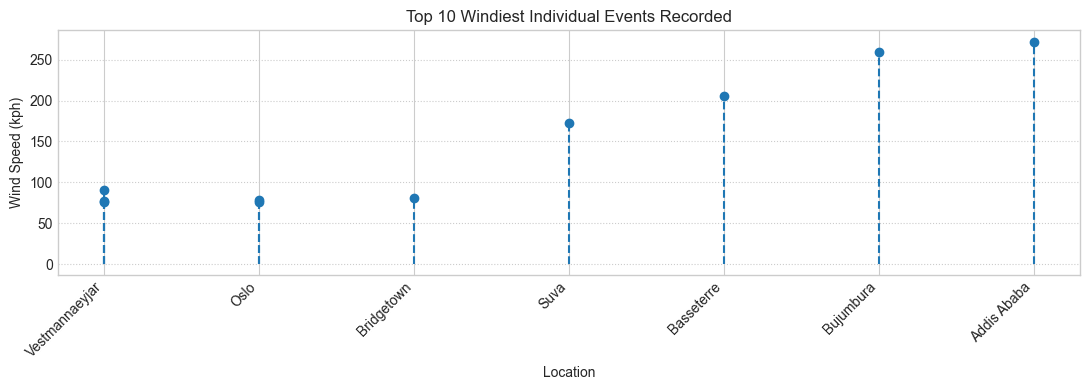

In [36]:
# Visualization 3: Top 10 Windiest Events (Lollipop Plot)
top_10_windy = df_cleaned.nlargest(10, 'wind_kph').sort_values('wind_kph')
plt.figure(figsize=(11, 4))
plt.stem(top_10_windy['location_name'], top_10_windy['wind_kph'], linefmt='--', markerfmt='o', basefmt=" ")
plt.xticks(rotation=45, ha='right')
plt.ylabel('Wind Speed (kph)')
plt.xlabel('Location')
plt.title('Top 10 Windiest Individual Events Recorded')
plt.grid(axis='y', linestyle=':')
plt.tight_layout()
plt.show()

    MILESTONE-2 COMPLETED